TABLA BANNER

In [1]:
import pandas as pd



Se filtran columnas que no son necesarias

FILTRA datos de file_valida3

In [2]:
## funcion que recibe nombre de archivo excel y de hoja a leer
def open_excel(file, sheet):
    return pd.read_excel(file, sheet_name = sheet)

NOTAS DE ADVANCE

In [3]:
con_facultad = "21_01_2021 query_listado_notas_sin CSEX.xlsx"
datos_actualizador = "20_01_2021 query_listado_notas_sin CSEX.xlsx"
sin_csex  = "19_01_2021 query_listado_notas_sin CSEX.xlsx"
desde_query = "19_01_2021 query_listado_notas.xlsx"
actualizado = '19_01_2021_SALIDA_ADVANCE ACTUALIZADO.xls'
no_actualizado = '19_01_2021_SALIDA_ADVANCE.xls'

#advance_notas = open_excel(no_actualizado,'Sheet1')
advance_notas = open_excel(con_facultad,'Hoja1')

In [4]:
## Cuenta notas con R
total_columnas = advance_notas['course_id'].count()
con_R_columnas = advance_notas[ advance_notas['NOTA_FINAL_BANNER'] == 'R' ]['course_id'].count()

print("TOTAL columnas:\t\t\t{}".format(total_columnas))
print("R en NOTA_FINAL_BANNER:\t\t{}".format(con_R_columnas))
print("% con R:\t\t\t{}%".format(  round(con_R_columnas*100/total_columnas,1) ))

TOTAL columnas:			3882
R en NOTA_FINAL_BANNER:		52
% con R:			1.3%


In [5]:
## Omite notas con NOTA_FINAL_BANNER = R
advance_notas = advance_notas[ advance_notas['NOTA_FINAL_BANNER'] != "R" ]

In [6]:
## unifica el nombre de las columnas
advance_notas["NOTA_FINAL_BANNER"] = pd.to_numeric(advance_notas["NOTA_FINAL_BANNER"], downcast="float") ## convierto columna a float
advance_notas.rename(columns={'NOTA_FINAL_REAL': 'NOTA_FINAL_REAL_BB', 'EXAMEN_REAL': 'NOTA_EXAMEN_BB','NOTA_PRESENTACION_REAL':'NOTA_PRESENTACION_BB', 'NRC':'nrc'}, inplace=True)
advance_notas['USER_MAS_COURSE_ID'] = advance_notas['user_id'] + advance_notas['course_id']

advance_notas['DIFERENCIA_NOTAS'] = round( advance_notas['NOTA_FINAL_BANNER'] - advance_notas['NOTA_FINAL_REAL_BB'], 1)
advance_notas[['user_id','NOTA_FINAL_REAL_BB','NOTA_FINAL_BANNER','DIFERENCIA_NOTAS']].head(3)

,user_id,NOTA_FINAL_REAL_BB,NOTA_FINAL_BANNER,DIFERENCIA_NOTAS
0,d.guardamartinez,2.1,7.0,4.9
1,d.guardamartinez,4.3,6.2,1.9
2,d.guardamartinez,6.7,6.7,-0.0


CONTAR SIN NOTA

########################################################################################################

NOTAS PARA PROCESAMIENTO DE DATOS Y ANALISIS

Se crea una tabla unica con las que se va a trabajar en los posteriores procesamientos, con el fin de evitar la reescritura de codigo cada vez que se cambie una fuente de datos


In [7]:
## ANALISIS CON DATOS ANTES DEL 13 DE ENERO 2020
#notas = merged_files
notas = advance_notas.fillna(0)

## ANALISIS CON DATOS 13 DE ENERO 2020 (posterior a correr ajuste de notas en servidor)
#notas = notas_unidas[['USER_MAS_COURSE_ID','NOTA_PRESENTACION_BB','NOTA_EXAMEN_BB','NOTA_FINAL_REAL_BB','NOTA_EXAMEN_BANNER','NOTA_FINAL_BANNER','DIFERENCIA_NOTAS']]

###########################################

DEA

In [8]:
## VISUALIZACION PREVIA DE LOS DATOS
notas.head(3)

,course_id,COURSE_NAME,CODIGO,PERIODO,nrc,METODO_EDUCATIVO,TIPO_HORARIO,RUT,user_id,cod_fac,facultad,NOTA_EXAMEN_BB,NOTA_PRESENTACION_BB,NOTA_FINAL_REAL_BB,EXAMEN_BANNER,NOTA_PRESENTACION_BANNER,NOTA_FINAL_BANNER,USER_MAS_COURSE_ID,DIFERENCIA_NOTAS
0,202025_1103_IAEA401,TECNICAS DE COMU EN MARKETING,IAEA401,202025,1103,EL,TAL,139894316,d.guardamartinez,ECOM,ECONOMÍA Y NEGOCIOS,0.0,0.0,2.1,0.0,0.0,7.0,d.guardamartinez202025_1103_IAEA401,4.9
1,202025_1105_IAEA402,MARKETING,IAEA402,202025,1105,EL,TEO,139894316,d.guardamartinez,ECOM,ECONOMÍA Y NEGOCIOS,0.0,0.0,4.3,0.0,6.2,6.2,d.guardamartinez202025_1105_IAEA402,1.9
2,202025_1107_IAEA403,ADMINISTRACIÓN FINANCIERA,IAEA403,202025,1107,EL,TEO,139894316,d.guardamartinez,ECOM,ECONOMÍA Y NEGOCIOS,0.0,0.0,6.7,0.0,6.7,6.7,d.guardamartinez202025_1107_IAEA403,-0.0


In [9]:
## CON EXIMIDOS
notas.groupby(['facultad']).count()

,course_id,COURSE_NAME,CODIGO,PERIODO,nrc,METODO_EDUCATIVO,TIPO_HORARIO,RUT,user_id,cod_fac,NOTA_EXAMEN_BB,NOTA_PRESENTACION_BB,NOTA_FINAL_REAL_BB,EXAMEN_BANNER,NOTA_PRESENTACION_BANNER,NOTA_FINAL_BANNER,USER_MAS_COURSE_ID,DIFERENCIA_NOTAS
facultad,,,,,,,,,,,,,,,,,,
ECONOMÍA Y NEGOCIOS,1979,1979,1979,1979,1979,1979,1979,1979,1979,1979,1979,1979,1979,1979,1979,1979,1979,1979
EDUCACIÓN Y CIENCIAS SOCIALES,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129
INGENIERÍA,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722


In [10]:
## OMITE EXIMIDOS (NOTA PRESENTACION >= 6)
#notas = notas[ notas['NOTA_PRESENTACION_BB'] < 6 ].fillna(0)
EXIMICION_ING = 5
EXIMICION_ECO = 5.5
EXIMICION_EDU = 5.3

## se borran registros de alumnos EXIMIDOS
notas = notas[ ( (notas['NOTA_PRESENTACION_BANNER'] < EXIMICION_ING) & (notas['facultad'] == 'INGENIERÍA') )
             | ( (notas['NOTA_PRESENTACION_BANNER'] < EXIMICION_ECO) & (notas['facultad'] == 'ECONOMÍA Y NEGOCIOS') )
             | ( (notas['NOTA_PRESENTACION_BANNER'] < EXIMICION_EDU) & (notas['facultad'] == 'EDUCACIÓN Y CIENCIAS SOCIALES') )]

In [11]:
## SIN EXIMIDOS
notas.groupby(['facultad']).count()

,course_id,COURSE_NAME,CODIGO,PERIODO,nrc,METODO_EDUCATIVO,TIPO_HORARIO,RUT,user_id,cod_fac,NOTA_EXAMEN_BB,NOTA_PRESENTACION_BB,NOTA_FINAL_REAL_BB,EXAMEN_BANNER,NOTA_PRESENTACION_BANNER,NOTA_FINAL_BANNER,USER_MAS_COURSE_ID,DIFERENCIA_NOTAS
facultad,,,,,,,,,,,,,,,,,,
ECONOMÍA Y NEGOCIOS,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800,800
EDUCACIÓN Y CIENCIAS SOCIALES,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
INGENIERÍA,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434,434


In [12]:
## Se toman unicamente los de la facultad de ingenieria
#notas = notas[ notas['facultad'] == 'INGENIERÍA']

## SE ELIMINAN REGISTROS CON NOTA EXAMEN 0 o 1
notas = notas[ (notas['EXAMEN_BANNER'] > 1) & (notas['NOTA_EXAMEN_BB'] > 1)]

In [13]:
TOTAL_REGISTROS = notas['user_id'].count()
SIN_NOTA_INGRESADA = notas[ (notas['NOTA_FINAL_REAL_BB'].fillna(0) == 0) | (notas['NOTA_FINAL_BANNER'] == 0).fillna(0) ]['user_id'].count()

print('TOTAL:\t\t\t{}'.format(TOTAL_REGISTROS))
print('CON NOTA:\t\t{}'.format(TOTAL_REGISTROS - SIN_NOTA_INGRESADA))
print('SIN NOTA:\t\t{}'.format(SIN_NOTA_INGRESADA))
print('% SIN NOTA:\t\t{}%'.format( round((SIN_NOTA_INGRESADA/TOTAL_REGISTROS)*100,1) ))

TOTAL:			342
CON NOTA:		342
SIN NOTA:		0
% SIN NOTA:		0.0%


In [14]:
notas_diferentes = notas[ notas['DIFERENCIA_NOTAS'] != 0 ]['USER_MAS_COURSE_ID'].count()
total_notas = notas['USER_MAS_COURSE_ID'].count()
porcentaje_notas_diferentes = notas_diferentes / total_notas

In [15]:
print('TODOS\nnotas diferentes:\t\t{0}\ntotal notas:\t\t\t{1}\nporcentaje notas diferentes:\t{2}%'.format(notas_diferentes, total_notas, round(porcentaje_notas_diferentes*100,1) ) )

TODOS
notas diferentes:		162
total notas:			342
porcentaje notas diferentes:	47.4%


In [16]:
## OMITE VALORES CON NOTA NULL
notas = notas[ (notas['NOTA_FINAL_REAL_BB'] != 0) & (notas['NOTA_FINAL_BANNER'] != 0) ]

notas_diferentes = notas[ notas['DIFERENCIA_NOTAS'] != 0 ]['USER_MAS_COURSE_ID'].count()
total_notas = notas['USER_MAS_COURSE_ID'].count()
porcentaje_notas_diferentes = notas_diferentes / total_notas

print('FILTRANDO SIN NOTAS EN BANNER O BB\nnotas diferentes:\t\t{0}\ntotal notas:\t\t\t{1}\nporcentaje notas diferentes:\t{2}%'.format(notas_diferentes, total_notas, round(porcentaje_notas_diferentes*100,1) ) )
print('notas iguales:\t\t\t{0}\nporcentaje notas iguales:\t{1}%'.format(total_notas-notas_diferentes, round((1-porcentaje_notas_diferentes)*100,1) ) )

FILTRANDO SIN NOTAS EN BANNER O BB
notas diferentes:		162
total notas:			342
porcentaje notas diferentes:	47.4%
notas iguales:			180
porcentaje notas iguales:	52.6%


In [17]:
## del total
eximidos = notas[ notas['NOTA_PRESENTACION_BB'] >= 5.5 ]['NOTA_PRESENTACION_BB'].count()
total = notas['NOTA_PRESENTACION_BB'].count() if notas['NOTA_PRESENTACION_BB'].count() != 0 else 1


## de notas con diferenica
eximidos_diferencia_notas = notas[ (notas['NOTA_PRESENTACION_BB'] >= 5.5) & (notas['DIFERENCIA_NOTAS'] > 0) ]['NOTA_PRESENTACION_BB'].count()
total_diferencia_notas = notas[notas['DIFERENCIA_NOTAS'] > 0]['NOTA_PRESENTACION_BB'].count()

print("Eximidos:\t\t\t\t\t\t\t{}".format(eximidos))
print("porcentaje eximidos del total alumnos:\t\t\t\t{}%".format(round(eximidos/total,2)*100))
print("porcentaje eximidos entre alumnos con diferencia de notas:\t{}%".format(round(eximidos_diferencia_notas/total_diferencia_notas,2)*100))

Eximidos:							3
porcentaje eximidos del total alumnos:				1.0%
porcentaje eximidos entre alumnos con diferencia de notas:	0.0%


ESTUDIANTES POR DIFERENCIA DE NOTAS EN PUNTOS (1 PTO = 10 DECIMAS)

Eje X = puntos de diferencia entre ambas notas. 
Eje Y = numero de alumnos con dicha diferecia en sus notas OBS: se omiten alumnos sin diferencia de notas (diferencia == 0)

In [18]:
## FUNCION GRAFICO BARRA CON BINS
def barplot_bins(x_axis, title='', x_label='',y_label='', x_max=10, x_min=-10, y_max=10, y_min=-10):
    import matplotlib.pyplot as plt
    import numpy as np

    min_diff = x_axis.min()
    max_diff = x_axis.max()
    diff = abs(int(np.diff([ max_diff, min_diff ])[0]*10)) ## se extrae diferencia en puntos (1 pto = 10 decimas) y se multiplica por 10 para obtener decimas

    bins = pd.cut(x_axis, bins=diff) ## se crean valores para hacer agrupacion por rango
    y = x_axis.groupby(bins).count()  ## se agrupan diferencias de notas por rango de diferencia
    x = range(int(min_diff*10)+1,int(max_diff*10)+1,1) ## se crea una lista de valores para eje X, y asi evitar exceso de texto (para no mostrar como rangos)
    plt.bar(x, y)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)


    ## SETEA RANGOS EN EJES X, Y
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)

    plt.show()

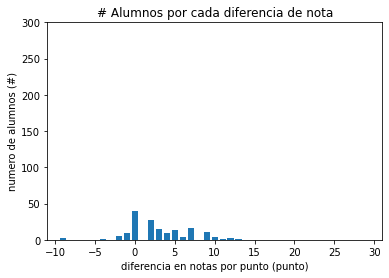

In [19]:
## FRECUENCIA CON QUE OCURREN DIFERENCIAS POR NOTA
x_axis = notas[ notas['DIFERENCIA_NOTAS'] != 0 ]['DIFERENCIA_NOTAS'] ## columna diferncia de nota donde no sea 0
title='# Alumnos por cada diferencia de nota'
x_label='diferencia en notas por punto (punto)'
y_label='numero de alumnos (#)'
x_max= 31
x_min = -11
y_max = 300
y_min = 0

barplot_bins(x_axis, title, x_label, y_label, x_max, x_min, y_max, y_min)

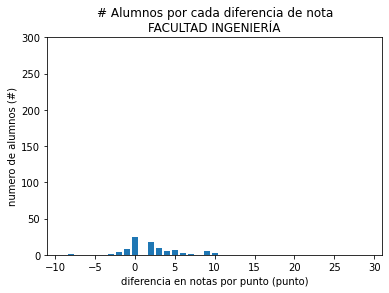

In [20]:
## FRECUENCIA CON QUE OCURREN DIFERENCIAS POR NOTA
## FILTRADO POR FACULTAD
ing = 'INGENIERÍA'
eco = 'ECONOMÍA Y NEGOCIOS'
edu = 'EDUCACIÓN Y CIENCIAS SOCIALES'
facultad = ing
x_axis = notas[ (notas['DIFERENCIA_NOTAS'] != 0) 
               & (notas['facultad'] == facultad) ]['DIFERENCIA_NOTAS'] ## columna diferncia de nota donde no sea 0
title='# Alumnos por cada diferencia de nota\nFACULTAD {}'.format(facultad)
x_label='diferencia en notas por punto (punto)'
y_label='numero de alumnos (#)'
x_max= 31
x_min = -11
y_max = 300
y_min = 0

barplot_bins(x_axis, title, x_label, y_label, x_max, x_min, y_max, y_min)

ESTUDIANTES NO EXIMIDOS (nota presentacion < 6) POR DIFERENCIA DE NOTAS EN PUNTOS (1 PTO = 10 DECIMAS)

Eje X = puntos de diferencia entre ambas notas.
Eje Y = numero de alumnos con dicha diferecia en sus notas.
OBS: se omiten alumnos sin diferencia de notas (diferencia == 0)

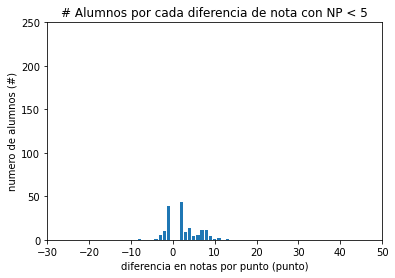

In [21]:
## EXIMIDOS
## FRECUENCIA CON QUE OCURREN DIFERENCIAS POR NOTA
x_axis = notas[ (notas['NOTA_PRESENTACION_BB'] < 5.5) & (notas['DIFERENCIA_NOTAS'] != 0) ]['DIFERENCIA_NOTAS'] ## columna diferncia de nota donde no sea 0
title='# Alumnos por cada diferencia de nota con NP < 5'
x_label='diferencia en notas por punto (punto)'
y_label='numero de alumnos (#)'
bins = 50
x_max= 50
x_min = -30
y_max = 250
y_min = 0

barplot_bins(x_axis, title, x_label, y_label, x_max, x_min, y_max, y_min)

NOTA_FINAL vs NotaFinalReal

Eje X = NOTA_FINAL.
EJE Y = NotaFinalReal (banner).
Se espera que ambos valores siempre sean iguales, si no son iguales (no estan en la recta que pasa por putos (1,1) a (7,7)), entonces tienen una diferencia en sus valores

In [22]:
def scatterplot(x_axis, y_axis, title='', x_label='', y_label='', color='black', label='', alpha=0.15):
    import matplotlib.pyplot as plt
    
    plt.plot(x_axis, y_axis, marker='o', markersize=2, linestyle='None', color=color, label=label, alpha=alpha)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(color='navy', linewidth=0.5, alpha=0.3)

    ## SETEA RANGOS EN EJES X, Y
    plt.xlim(0,7)
    plt.ylim(0,7)
    plt.legend()
    
    plt.show()

In [23]:
def hue_scatterplot(data, x_axis_name, y_axis_name, hue, size, title='', x_label='', y_label='', color='black', label='', alpha=0.15):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    sns.scatterplot(data=data, x=x_axis_name, y=y_axis_name, hue=hue, s=size, alpha=alpha, palette='hls')
    ## SETEA RANGOS EN EJES X, Y

    plt.show()

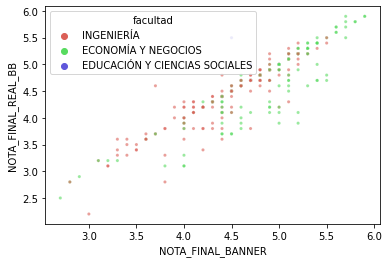

In [24]:
## CATEGORIZADO 
hue_scatterplot(notas, 'NOTA_FINAL_BANNER','NOTA_FINAL_REAL_BB','facultad', size=10, alpha=0.6)

 NOTA_FINAL vs NotaFinalReal PARA TODOS

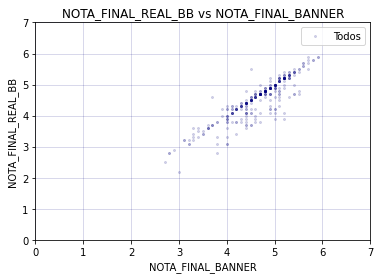

In [25]:
x_axis = notas['NOTA_FINAL_BANNER']
y_axis = notas['NOTA_FINAL_REAL_BB']
color = 'navy'
label = 'no eximidos'
title = 'NOTA_FINAL_REAL_BB vs NOTA_FINAL_BANNER'
x_label = 'NOTA_FINAL_BANNER'
y_label = 'NOTA_FINAL_REAL_BB'
legend = 'Todos'

scatterplot(x_axis, y_axis, title, x_label, y_label, color, legend, 0.15)

 NOTA_FINAL vs NotaFinalReal PARA NO EXIMIDOS (nota presentacion < 6)

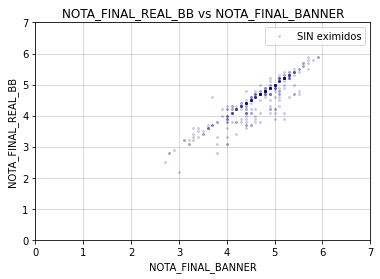

In [26]:
matriz_notas_no_eximidos = notas[ (notas['NOTA_PRESENTACION_BB'] < 5.5)  ][['NOTA_FINAL_BANNER','NOTA_FINAL_REAL_BB']]
x_axis = matriz_notas_no_eximidos['NOTA_FINAL_BANNER']
y_axis = matriz_notas_no_eximidos['NOTA_FINAL_REAL_BB']
color = 'navy'
label = 'no eximidos'
title = 'NOTA_FINAL_REAL_BB vs NOTA_FINAL_BANNER'
x_label = 'NOTA_FINAL_BANNER'
y_label = 'NOTA_FINAL_REAL_BB'
legend = 'SIN eximidos'

scatterplot(x_axis, y_axis, title, x_label, y_label, color, legend, 0.15)

In [27]:
sin_nota_presentacion = notas['user_id'].count()
print('sin nota de presentacion:\t\t{}'.format(sin_nota_presentacion))

sin nota de presentacion:		342


In [28]:
dif_extremas = notas[ (notas['DIFERENCIA_NOTAS'] > 0.3) & (notas['DIFERENCIA_NOTAS'] < 3) ][['course_id','CODIGO','PERIODO','nrc','RUT','NOTA_FINAL_REAL_BB','NOTA_FINAL_BANNER', 'DIFERENCIA_NOTAS']]

In [29]:
dif_extremas['course_id'].count()

52

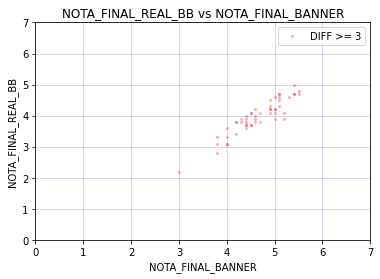

In [30]:
matriz = dif_extremas[['NOTA_FINAL_REAL_BB','NOTA_FINAL_BANNER']]
x_axis = matriz['NOTA_FINAL_BANNER']
y_axis = matriz['NOTA_FINAL_REAL_BB']
color = 'red'
label = 'no eximidos'
title = 'NOTA_FINAL_REAL_BB vs NOTA_FINAL_BANNER'
x_label = 'NOTA_FINAL_BANNER'
y_label = 'NOTA_FINAL_REAL_BB'
legend = 'DIFF >= 3'

scatterplot(x_axis, y_axis, title, x_label, y_label, color, legend, 0.25)

CORRELACION ENTRE DATOS

In [31]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
 
## TODAS LAS NOTAS
notas_num = notas[['NOTA_EXAMEN_BB','NOTA_PRESENTACION_BB','NOTA_FINAL_REAL_BB','EXAMEN_BANNER','NOTA_PRESENTACION_BANNER','NOTA_FINAL_BANNER','DIFERENCIA_NOTAS','facultad']]

## TODAS LAS NOTES QUITANDO EXAMENES CON 0 o 1
#notas_num = notas[ (notas['EXAMEN_BANNER'] != 0) & (notas['NOTA_EXAMEN_BB'] != 0) & (notas['EXAMEN_BANNER'] != 1) & (notas['NOTA_EXAMEN_BB'] != 1)][['NOTA_EXAMEN_BB','NOTA_PRESENTACION_BB','NOTA_FINAL_REAL_BB','EXAMEN_BANNER','NOTA_PRESENTACION_BANNER','NOTA_FINAL_BANNER','DIFERENCIA_NOTAS','facultad']]

In [32]:
notas_corr = notas_num.corr()

<AxesSubplot:>

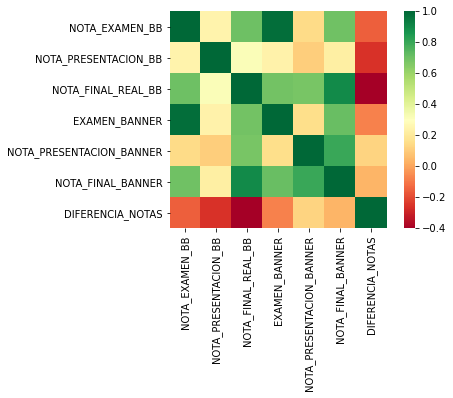

In [33]:
import seaborn as sns
sns.heatmap(notas_corr, square=True,cmap='RdYlGn' )

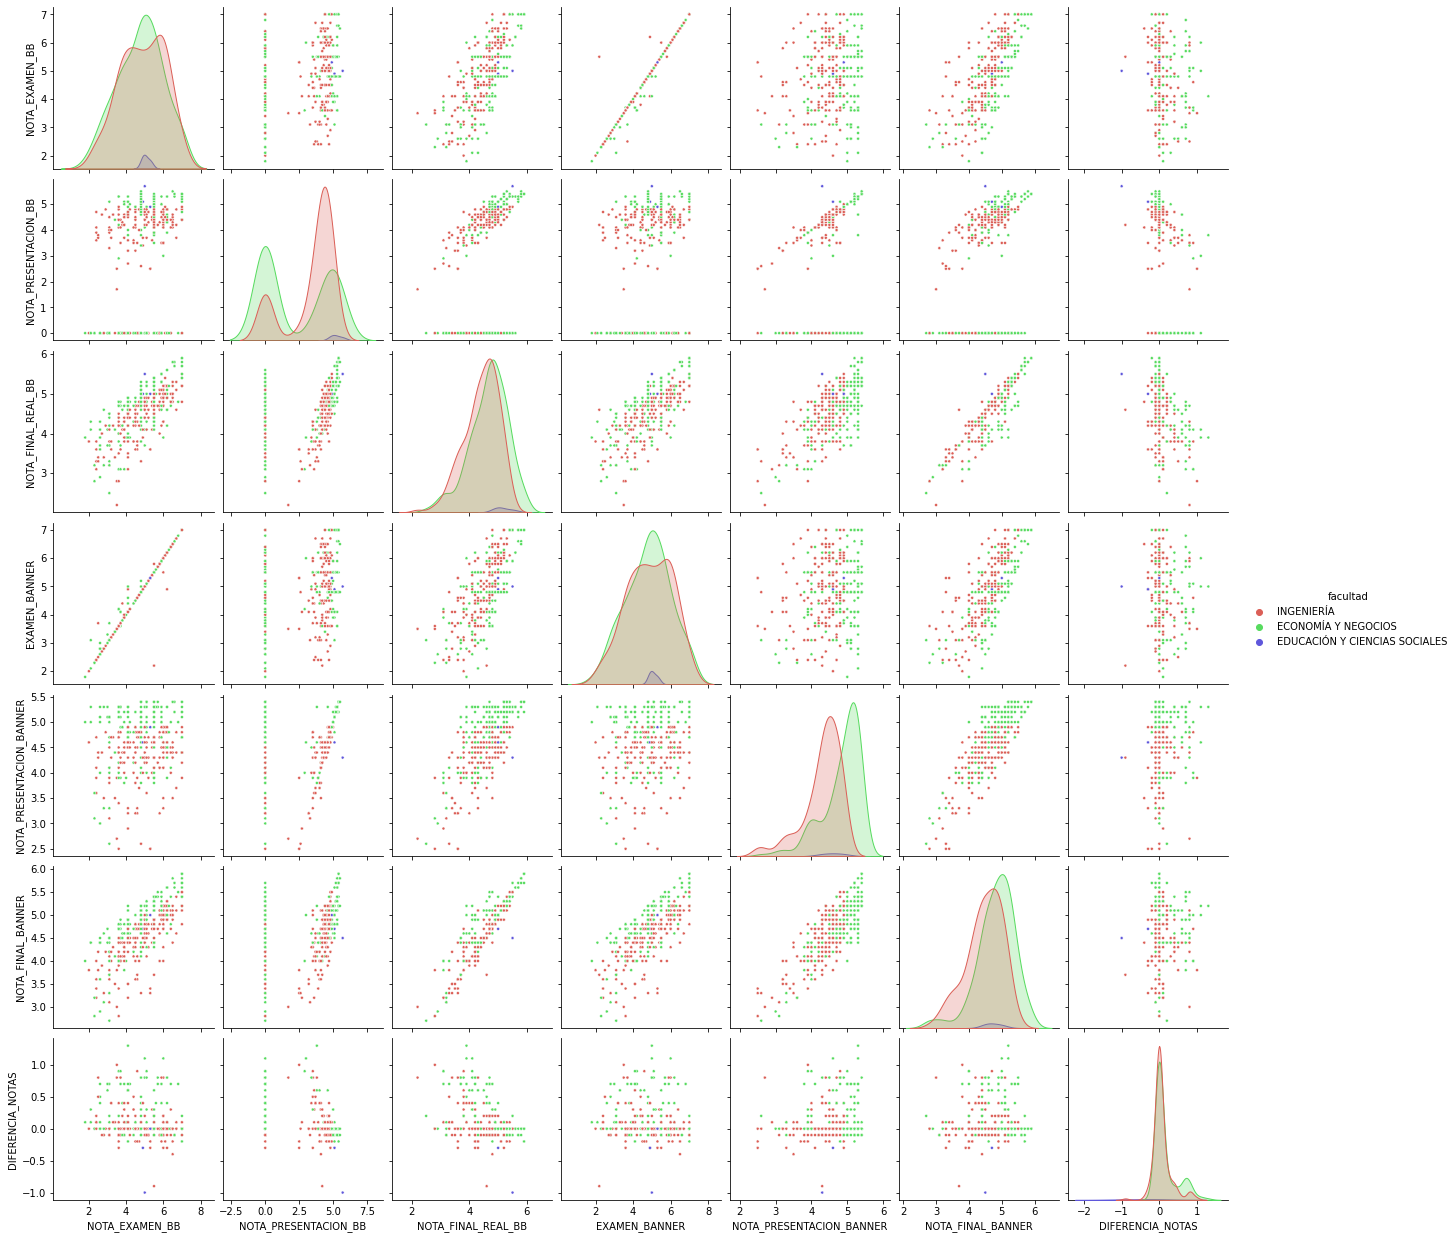

In [34]:
# with regression
sns.pairplot(notas_num, kind="scatter", hue="facultad", markers=".", palette="hls")
plt.show()

In [35]:
## CUANTOS TIENEN EXAMEN CON 0 o 1

ex_bn_zero = notas_num[ (notas_num['EXAMEN_BANNER'] == 0)]['facultad'].count()
ex_bb_zero = notas_num[ (notas_num['NOTA_EXAMEN_BB'] == 0)]['facultad'].count()
ex_bn_one = notas_num[ (notas_num['EXAMEN_BANNER'] == 1)]['facultad'].count()
ex_bb_one = notas_num[ (notas_num['NOTA_EXAMEN_BB'] == 1)]['facultad'].count()

print("EXAMEN BANNER = 0: \t\t{}".format(ex_bn_zero))
print("EXAMEN BlackBoard = 0: \t\t{}".format(ex_bb_zero))
print("\nEXAMEN BANNER = 1: \t\t{}".format(ex_bn_one))
print("EXAMEN BlackBoard = 1: \t\t{}".format(ex_bb_one))

EXAMEN BANNER = 0: 		0
EXAMEN BlackBoard = 0: 		0

EXAMEN BANNER = 1: 		0
EXAMEN BlackBoard = 1: 		0


In [36]:
notas_nuevas = notas[ (notas['NOTA_FINAL_BANNER'] < 4) & (notas['NOTA_FINAL_REAL_BB'] >= 4) ][['course_id','RUT','user_id','NOTA_FINAL_BANNER','NOTA_FINAL_REAL_BB']]
casos_limite_reprobados = notas_nuevas[ (notas_nuevas['NOTA_FINAL_BANNER'] < 4) & (notas_nuevas['NOTA_FINAL_REAL_BB'] >= 4) ]
print('casos limite donde fueron reprobados en banner con nota BB >= 4:\t\t{}'.format(casos_limite_reprobados['user_id'].count()))

casos limite donde fueron reprobados en banner con nota BB >= 4:		3


In [37]:
casos_limite_reprobados

,course_id,RUT,user_id,NOTA_FINAL_BANNER,NOTA_FINAL_REAL_BB
1931,202025_1382_AIND1204,15602662K,e.aguirreespinoza,3.7,4.6
2568,202025_1327_AIND0001,126279701,e.leytonherrera,3.9,4.2
3422,202025_1382_AIND1204,157532049,y.montenegrogarrido,3.9,4.0


In [38]:
notas[ notas['DIFERENCIA_NOTAS'] == 1 ]

,course_id,COURSE_NAME,CODIGO,PERIODO,nrc,METODO_EDUCATIVO,TIPO_HORARIO,RUT,user_id,cod_fac,facultad,NOTA_EXAMEN_BB,NOTA_PRESENTACION_BB,NOTA_FINAL_REAL_BB,EXAMEN_BANNER,NOTA_PRESENTACION_BANNER,NOTA_FINAL_BANNER,USER_MAS_COURSE_ID,DIFERENCIA_NOTAS
71,202025_1519_IICG1202,ECONOMÍA,IICG1202,202025,1519,EL,TEO,174323526,m.moragarobles,INGE,INGENIERÍA,3.5,2.5,2.8,3.5,3.9,3.8,m.moragarobles202025_1519_IICG1202,1.0


SyntaxError: invalid character in identifier (<ipython-input-40-9edbbba72102>, line 1)

In [ ]:
## FILTRO ESTUDIANTE Y CURSO
def check_student_by_course(course, student_name):
    user_id = ''
    course_id = ''
    if(user_id != '' and course_id != ''):
        caso = notas[ (notas['course_id'] == course_id) & (notas['user_id'] == user_id) ][['course_id','RUT','user_id','NOTA_PRESENTACION_BANNER','NOTA_PRESENTACION_BB','NOTA_FINAL_BANNER','NOTA_FINAL_REAL_BB']]
        caso
